We want to check if the solution imprelementation is correct

In [23]:
import matplotlib.pyplot as plt
import numpy as np

import sys
from importlib import reload
sys.path.append("../scripts")
import solution as sol
sol = reload(sol)

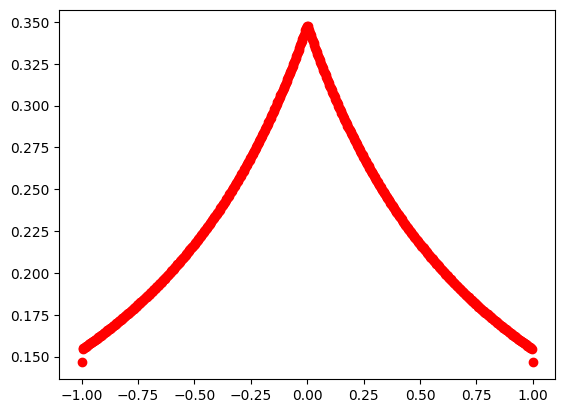

In [27]:
bins = 600
plt.scatter(np.linspace(-1,1,bins), sol.sol(0.1,0,bins), color = "r")

In [28]:
def integrate(dx,y):
    return(np.sum(dx*np.array(y)))

In [30]:
integrate(2/bins, sol.sol(0.1,0,bins))

0.4559054555852158

In [32]:
from scipy.special import eval_gegenbauer
import numpy as np

N = 300

def B(n, m0):
    C = eval_gegenbauer(n, 1.5, m0)
    return ((2*n+3)/((n+1)*(n+2))*C)

def la(n):
    return (1/4*n*(n+1))

def pi0(r, m0):
    # Boundary at m = 1 (No sign change needed)
    A = (1+m0)/2
    s = np.sum([B(n,m0)*r/(la(n+1)+r) for n in range(N)])
    return(A*(1-(1-m0)*s))

def pi1(r, m0):
    # Boundary at m = -1
    # FIX 1: The series must include (-1)^n to match the G0 derivation
    C_const = (1-m0)/2
    s = np.sum([B(n,m0)*r/(la(n+1)+r) * (-1)**n for n in range(N)]) 
    return(C_const*(1-(1+m0)*s))

def fk(r, m0, m):
    # Bulk density
    # No (1-m^2) weight needed here (my previous error).
    # Just sum the terms.
    s = 0
    for n in range(N):
        C = eval_gegenbauer(n, 1.5, m)
        s = s + B(n,m0)*r/(la(n+1)+r)*C
    return s # Removed the (1-m0**2) prefactor as it's likely absorbed in B def

def sol(r, m0, bins):
    # FIX 2: Increase bins to capture N=300 oscillations
    # If this is just for checking normalization, use high res
    effective_bins = max(bins, 2000) 
    m = np.linspace(-1, 1, effective_bins)
    
    # Calculate Bulk Density (fk already includes the expansion constants)
    # Note: We need to check if your B(n) definition needs the (1-m0^2) prefactor.
    # McKane's bulk term has p(1-p) which is approx (1-m0^2)/4.
    # Your fk returns just the sum. Let's apply the prefactor from your derivation.
    # In your Eq 31/34, the D term usually carries a prefactor. 
    # Based on McKane A.7, it is p(1-p) ~ (1-m0^2).
    
    prefactor = (1 - m0**2) 
    out = np.array([fk(r,m0,i) for i in m]) * prefactor
    
    # Integration for checking
    dm = m[1] - m[0]
    bulk_mass = np.trapz(out, dx=dm)
    
    p0 = pi0(r,m0)
    p1 = pi1(r,m0)
    
    print(f"Left Mass (pi1/m=-1): {p1:.4f}")
    print(f"Right Mass (pi0/m=1): {p0:.4f}")
    print(f"Bulk Mass: {bulk_mass:.4f}")
    print(f"Total: {p1 + p0 + bulk_mass:.4f}")

    # For plotting, you can downsample 'out' back to 'bins' if needed
    return out

# Run check
sol(0.5, 0, 100)

Left Mass (pi1/m=-1): 0.1726
Right Mass (pi0/m=1): 0.1726
Bulk Mass: 1.3096
Total: 1.6548


array([0.29916723, 0.3453611 , 0.34638857, ..., 0.34638857, 0.3453611 ,
       0.29916723])